# This Exploration Notebook evaluates the dataset.

# Training data exploration

In [1]:
%matplotlib inline
import matplotlib

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import numpy as np
import cv2
import glob

import logging as log
import sys
log.basicConfig(stream=sys.stderr, level=log.DEBUG)
import pickle

from search_classify import *
from heatmap import *
from lesson_functions import *

C:\Tools\Anaconda3\lib\site-packages\matplotlib\__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
cars = glob.glob("data/vehicles/*/*.png")
log.info("Number of cars: " + str(len(cars)))

notcars = glob.glob("data/non-vehicles/*/*.png")
log.info("Number of notcars: " + str(len(notcars)))

INFO:root:Number of cars: 8792
INFO:root:Number of notcars: 8968


Shape of a car (64, 64, 3)
Min/Max of a car 0.988235 0.121569
Shape of a notcar (64, 64, 3)
Min/Max of a notcar 0.839216 0.227451


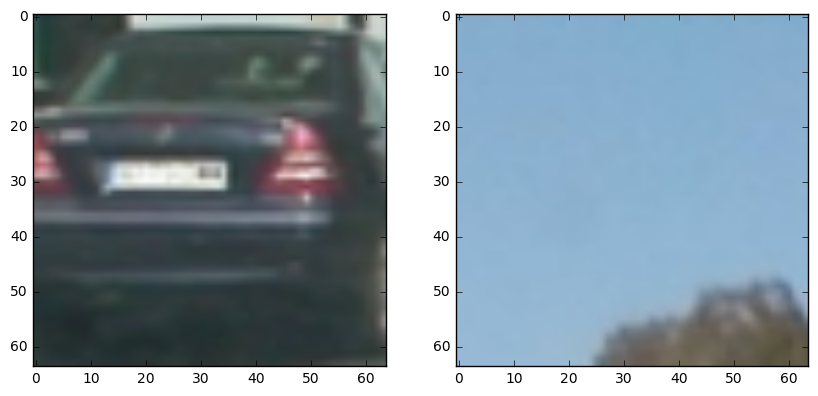

In [9]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
car = mpimg.imread(cars[1000])
plt.imshow(car)

plt.subplot(1,2,2)
nocar = mpimg.imread(notcars[1000])
plt.imshow(nocar)

print("Shape of a car", car.shape)
print("Min/Max of a car", np.max(car), np.min(car))
print("Shape of a notcar", nocar.shape)
print("Min/Max of a notcar", np.max(nocar), np.min(nocar))

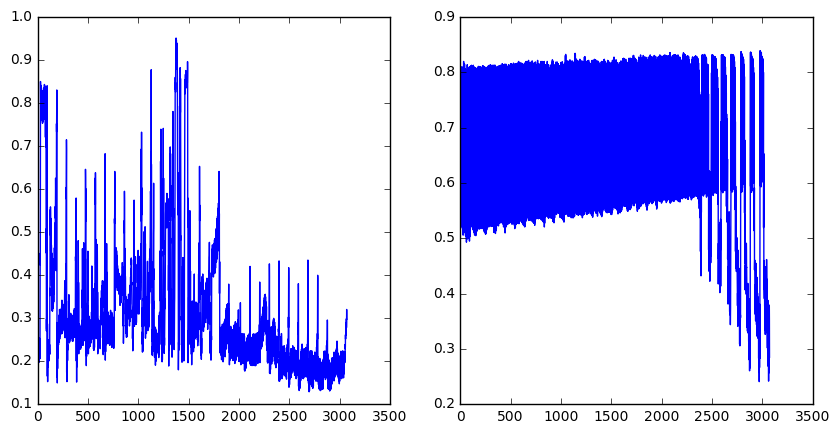

In [4]:
spatial_features_car = bin_spatial(car, size=spatial_size)
spatial_features_nocar = bin_spatial(nocar, size=spatial_size)

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.plot(spatial_features_car)

plt.subplot(1,2,2)
plt.plot(spatial_features_nocar)

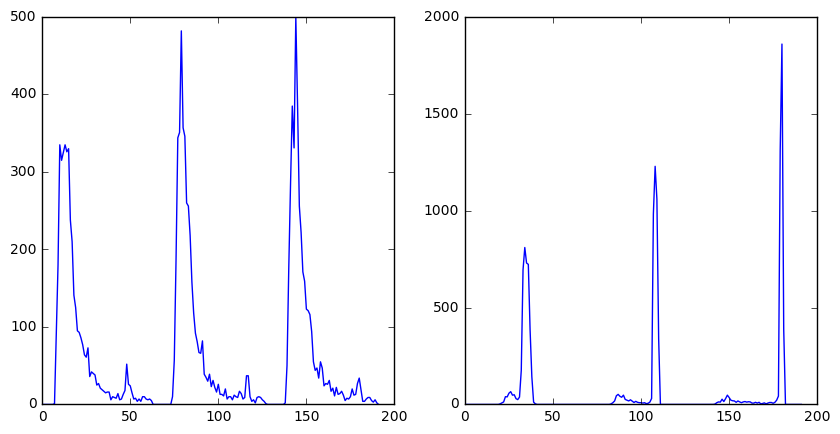

In [5]:
hist_features_car = color_hist(car, nbins=hist_bins, bins_range=(0, 1))
hist_features_nocar = color_hist(nocar, nbins=hist_bins, bins_range=(0, 1))

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.plot(hist_features_car)

plt.subplot(1,2,2)
plt.plot(hist_features_nocar)

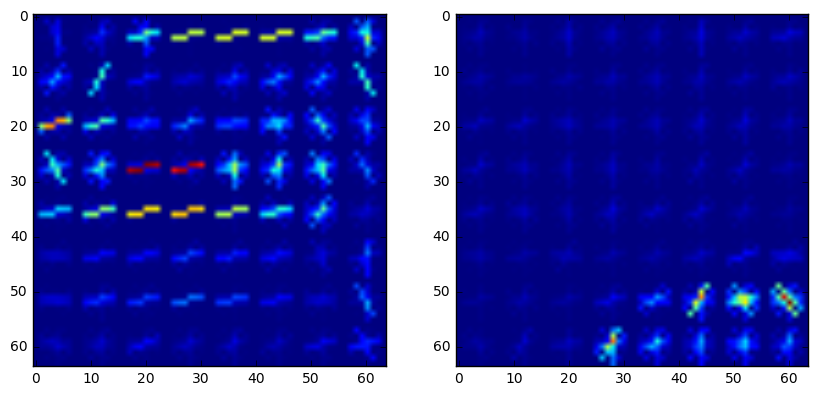

In [8]:
features, hog_image_car = get_hog_features(car[:,:,0],
                                           orient, 
                                           pix_per_cell,
                                           cell_per_block,
                                           vis=True,
                                           feature_vec=True)

features, hog_image_nocar = get_hog_features(nocar[:,:,0],
                                             orient, 
                                             pix_per_cell,
                                             cell_per_block,
                                             vis=True,
                                             feature_vec=True)

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(hog_image_car)

plt.subplot(1,2,2)
plt.imshow(hog_image_nocar)

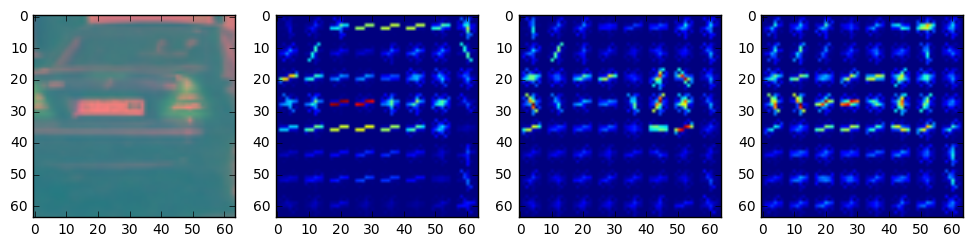

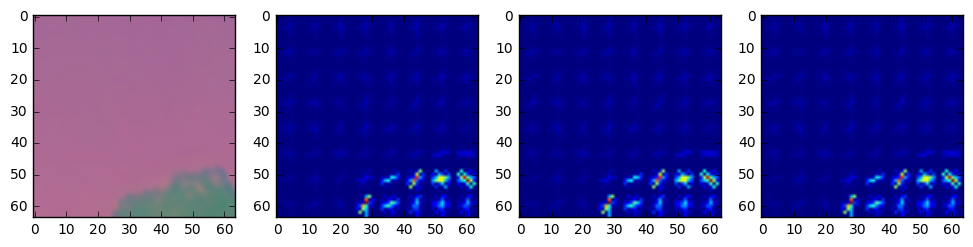

In [19]:
c = cv2.cvtColor(car, cv2.COLOR_RGB2YCrCb)
nc = cv2.cvtColor(nocar, cv2.COLOR_RGB2YCrCb)

sf_c = bin_spatial(c, size=spatial_size)
sp_nc = bin_spatial(nc, size=spatial_size)

feat_c, hog_c0 = get_hog_features(c[:,:,0],orient, pix_per_cell,cell_per_block,vis=True,feature_vec=True)
feat_c, hog_c1 = get_hog_features(c[:,:,1],orient, pix_per_cell,cell_per_block,vis=True,feature_vec=True)
feat_c, hog_c2 = get_hog_features(c[:,:,2],orient, pix_per_cell,cell_per_block,vis=True,feature_vec=True)

feat_c, hog_nc0 = get_hog_features(nc[:,:,0],orient, pix_per_cell,cell_per_block,vis=True,feature_vec=True)
feat_c, hog_nc1 = get_hog_features(nc[:,:,0],orient, pix_per_cell,cell_per_block,vis=True,feature_vec=True)
feat_c, hog_nc2 = get_hog_features(nc[:,:,0],orient, pix_per_cell,cell_per_block,vis=True,feature_vec=True)

plt.figure(figsize=(12, 5))
plt.subplot(1,4,1)
plt.imshow(c)
plt.subplot(1,4,2)
plt.imshow(hog_c0)
plt.subplot(1,4,3)
plt.imshow(hog_c1)
plt.subplot(1,4,4)
plt.imshow(hog_c2)

plt.figure(figsize=(12, 5))
plt.subplot(1,4,1)
plt.imshow(nc)
plt.subplot(1,4,2)
plt.imshow(hog_nc0)
plt.subplot(1,4,3)
plt.imshow(hog_nc1)
plt.subplot(1,4,4)
plt.imshow(hog_nc2)

# Video image exploration

In [ ]:
images = glob.glob("video2images/all/*.png")
log.info("Number of images: " + str(len(images)))

In [ ]:
image = mpimg.imread(images[20])

plt.figure(figsize=(10, 5))
plt.imshow(image)
print(np.max(image), np.min(image))

In [ ]:
feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)

In [ ]:
spatial_features = bin_spatial(feature_image, size=spatial_size)

print(spatial_features)
print(spatial_features.shape)

plt.plot(spatial_features)

In [ ]:
hist_features = color_hist(feature_image, nbins=hist_bins, bins_range=(0, 1))

print(hist_features)
print(hist_features.shape)

plt.plot(hist_features)

In [ ]:
features, hog_image = get_hog_features(feature_image[:,:,0],
                                       orient, 
                                       pix_per_cell,
                                       cell_per_block,
                                       vis=True,
                                       feature_vec=True)

plt.imshow(hog_image)

Readme